In [1]:
import numpy as np
import matplotlib.pyplot as plt

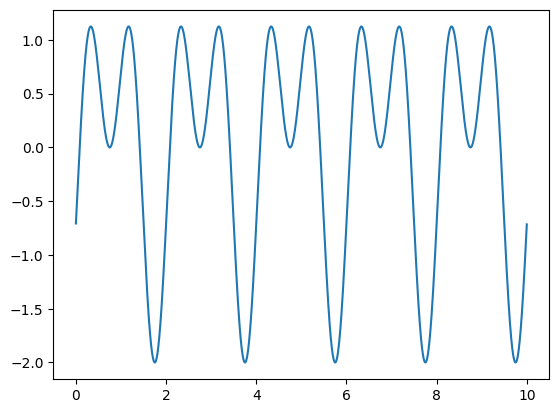

In [23]:
t = np.arange(0,10,0.001)
clean_signal = np.sin(2*np.pi*t)+np.sin(2*np.pi*t/2-np.pi/4)
plt.plot(t,clean_signal)

In [24]:
noise = np.random.uniform(np.min(clean_signal)/3, np.max(clean_signal)/3, len(t))
noisy_signal = clean_signal + noise

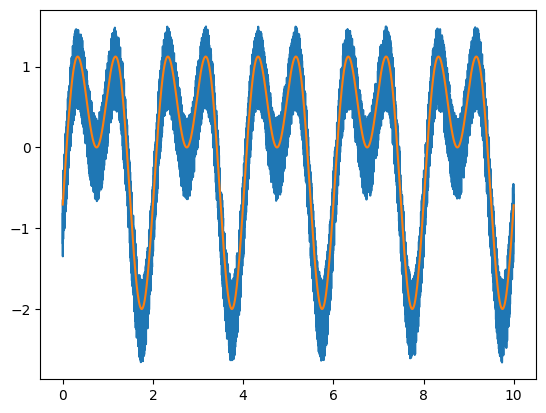

In [27]:
plt.plot(t,noisy_signal)
plt.plot(t,clean_signal)

In [25]:
fil = np.ones(100)

s_convol = np.ones(len(clean_signal)+2*len(fil)//2-1)
s_convol[len(fil)//2:len(fil)//2+len(clean_signal)] = noisy_signal
print(len(s_convol))

10099


In [28]:
s_matrix = []
for i in range(len(clean_signal)):
    s_matrix.append(s_convol[i:i+len(fil)])
s_matrix = np.array(s_matrix)
print(s_matrix.shape)

(10000, 100)


In [13]:
c = np.linalg.lstsq(s_matrix, clean_signal)
print(c[0])

[0.00488332 0.00515695 0.00501382 0.00498958 0.00521584 0.00511345
 0.00480443 0.00459188 0.00490266 0.00492689 0.00496082 0.00459502
 0.00439814 0.00404136 0.00383294 0.00405459 0.00427053 0.00427869
 0.00433193 0.00494011 0.00542555 0.00527663 0.00563839 0.00623541
 0.00650444 0.00693239 0.0072252  0.00789528 0.00825967 0.00878536
 0.00904853 0.00909177 0.00978869 0.0101644  0.01052436 0.01093952
 0.01172292 0.01256448 0.01364126 0.01462939 0.01515023 0.01633167
 0.01741962 0.0187119  0.01979331 0.02093551 0.02247788 0.02370634
 0.02472037 0.02644718 0.0282206  0.0266353  0.02500256 0.02407963
 0.0223864  0.02159053 0.02009385 0.01893715 0.01764441 0.01669006
 0.01592669 0.01560575 0.01442913 0.01377893 0.01337812 0.01247846
 0.01144768 0.01102339 0.01039    0.01029924 0.01020183 0.00952912
 0.00892313 0.00870745 0.00785974 0.00744007 0.00721105 0.00708163
 0.00687379 0.0062835  0.00640966 0.0058334  0.00540488 0.00531596
 0.0048988  0.00458173 0.0041904  0.00423369 0.00451311 0.0045

<ipython-input-13-2078be7ffb5b>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  c = np.linalg.lstsq(s_matrix, clean_signal)


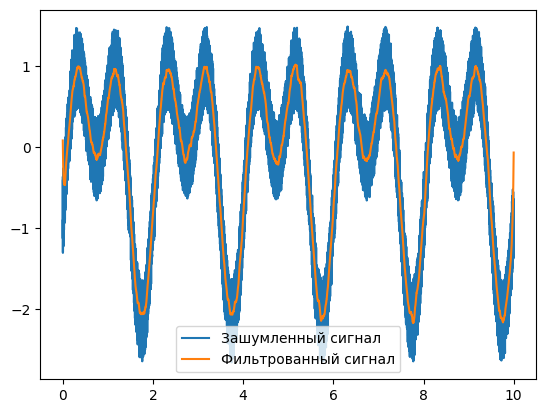

In [14]:
s_filt = s_matrix @ c[0]#[::-1]
plt.plot(t, noisy_signal, label = 'Зашумленный сигнал')
plt.plot(t, s_filt, label = 'Фильтрованный сигнал')
plt.legend()
plt.show()

(array([1145.,  510.,  420.,  370.,  370.,  370., 1535., 1270., 1310.,
        2700.]),
 array([-2.        , -1.68750034, -1.37500069, -1.06250103, -0.75000137,
        -0.43750172, -0.12500206,  0.1874976 ,  0.49999725,  0.81249691,
         1.12499657]),
 <BarContainer object of 10 artists>)

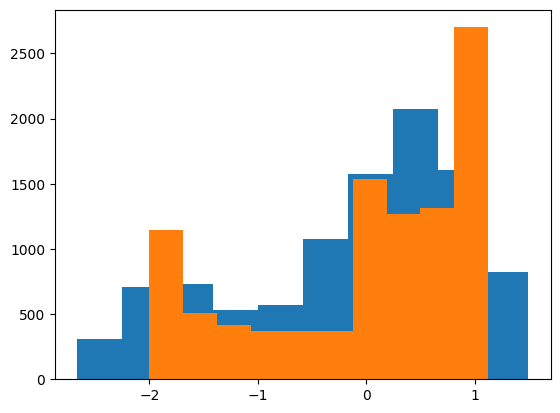

In [15]:
plt.hist(noisy_signal)
plt.hist(clean_signal)

In [30]:
learning_rate = 0.0001
order = 32
adaptive_filter = np.zeros(order)
for i in range(order, len(noisy_signal)):
    input_vector = noisy_signal[i - order:i][::-1]
    pred = np.dot(adaptive_filter, input_vector)
    error = noisy_signal[i] - pred
    adaptive_filter = adaptive_filter + learning_rate * error * input_vector

filtered_signal = np.convolve(noisy_signal, adaptive_filter, mode='same')

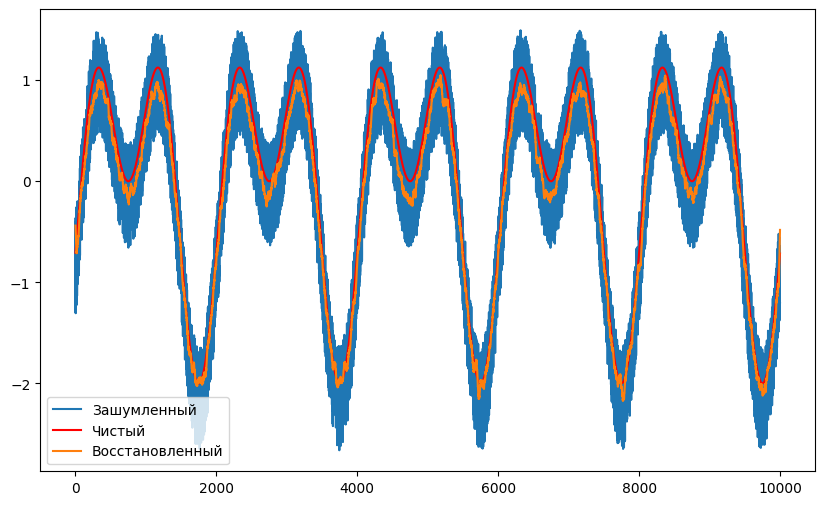

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(noisy_signal, label='Зашумленный')
plt.plot(clean_signal, label='Чистый', c='r')
plt.plot(filtered_signal, label='Восстановленный')
plt.legend()
plt.show()